<a href="https://colab.research.google.com/github/dksifoua/Reinforcement-Learning/blob/master/01_Decision_Making_Under_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision making under uncertainty

## Sequential decision making with evaluative feedback

In RL, the agent generates its own training data by interacting with the world. The agent must learn the consequences 
of its own actions through trials and errors rather than being told the correct actions.

A. **The K-armed bandit problem**

In a k-armed bandit problem, we have an **agent** who chooses between $k$ **actions** and receives a **reward** based 
on the action it chooses.

B. **Action-Values**

For the agent decides which action is best, we must define a velue of taking each action called 
**action-values function**.

- The **value** is the **expected reward** the agent receives when taking an action.

$$q_*(a) \; \dot{=} \; \mathbb{E}[R_t|A_t=a] \;\; \forall a \in \{1, ..., k\} \\
= \sum_r p(r|a) \; r$$

- The goal of the agent is to **maximize** the **expected reward** by selecting the action that have the highest value.

$$argmax_a \; q_*(a)$$

## Learning Action-Values

The objective is to **estimate** $Q(a) \rightarrow q_*(a)$.

A. **Sample-Average Method**

One way to estimate $q_*(a)$ is to compute a sample average:

$$Q_t(a) \; \dot{=} \; \frac{\sum_{i=1}^{t-1}R_i \; I[A_i = a]}{\sum_{i=1}^{t-1}\; I[A_i = a]}$$

If the denominator is $0$, we defined $Q(a)$ at some default value such as $0$.

As $\sum_{i=1}^{t-1}\; I[A_i = a] \rightarrow +\infty$, $\;Q_t(a) \rightarrow q_*(a)$ (*Law of large numbers*).

The sample-average method is not necessarily the best one for selecting action-values.

Calculating $Q_t(a)$ by using the formula above implies memory and computational requirements which increase as $t$ 
increases. So, we  use an **incremental implementation**

Let's $Q_n = \frac{R_1 + R_2 + ... + R_{n-1}}{n - 1}$

$$\Rightarrow Q_{n + 1} = \frac{1}{n} \sum_{i=1}^n R_i = \frac{1}{n} [R_n + \sum_{i=1}^{n-1} R_i] = \frac{1}{n} 
[R_n + (n - 1) \frac{1}{n-1} \sum_{i=1}^{n-1} R_i] = \frac{1}{n} [R_n + (n-1)Q_n] = \frac{1}{n} (R_n + nQ_n  - Q_n) = 
Q_n + \frac{1}{n} (R_n - Q_n)$$

We obtain the update rule: **New Estimate $\leftarrow$ Old Estimate + Step Size [Target - Old Estimate]**

Step Size = $\alpha = \alpha_t(a) = \frac{1}{n} \in [0, 1)$

B. **Tracking non-stationary problem - Exponential recency-weighted average**

When the probability of reward changes over time (in most RL problems), it makes sense to give more weight to recent 
rewards than to long-past rewards.

$$Q_{n+1} = Q_n + \alpha (R_n - Q_n) = \alpha R_n + (1 - \alpha) Q_n = \alpha R_n + (1 - \alpha) [\alpha R_{n-1} + 
(1 - \alpha) Q_{n - 1}] = \alpha R_n + (1 - \alpha) \alpha R_{n - 1} + (1 - \alpha)^2 Q_{n - 1} = \alpha R_n + 
(1 - \alpha) \alpha R_{n - 1} + (1 - \alpha)^2 [\alpha R_{n-2} + (1 - \alpha) Q_{n - 2}] = \alpha R_n + (1 - \alpha) 
\alpha R_{n - 1} + (1 - \alpha)^2 \alpha R_{n - 2} + (1 - \alpha)^3 Q_{n - 2} = \;...$$
$$\Rightarrow Q_{n+1} = (1 - \alpha)^n Q_1 + \sum_{i=1}^n \alpha (1 - \alpha)^{n-i}R_i$$

The convergence is guarantedd with $\alpha_n(a) = \frac{1}{n}$.

Sometimes, it is convenient to change $\alpha_n(a)$ from step to step. But of course convergence is guaranteed for all 
choices of the sequence $\{\alpha_n(a)\}$.

A well-known result in stochastic approximation theory gives us the conditions required to ensure convergence with 
probability 1:

1. $\sum_{n=1}^\infty \alpha_n(a) = \infty$ guaranteed that the steps are large enough to eventually overcome any init 
conditions or random fluctuations.
2. $\sum_{n=1}^\infty \alpha_n(a) < \infty$ guaranteed that eventually the steps become small enough to ensure 
convergence.

These conditions are **true** with $\alpha_n(a) = \frac{1}{n}$ but **false** for the case of constant stepsize param 
$\alpha$ (which is desirable in non-stationary environments).

C. **Action selection**

- **Greedy action selection** (low reward variance): the agent always exploits its current knowledge to maximize the 
immediate reward.

$$A_t = argmax_a \; Q_t(a)$$

- **$\varepsilon$-greedy action selection** (high reward variance): every once in a while, the agent an action with a 
small probability $\varepsilon$. Every action will be sampled an infinite number of time as the number of steps 
increase. Thus, $Q_t(a) \rightarrow q_*(a) \Rightarrow P(a_t^*) \rightarrow 1 - \varepsilon$.

If the reward function is non-stationary (doesn't change over time), the exploration is needed i.e $\varepsilon$-greedy 
action selection.

## Exploration vs Exploitation tradeoff

The tradeoff is simply the way the agent decides when its takes the best action (according to its current knowledge) - 
exploitation or try something else (random) exploration. If the agent never chooses a particular action, it won't know 
its value.

- **Exploration**: *improve* knowledge for *long-term* benefit.

- **Exploitation**: *exploit* knowledge for *short-term* benefit.

When we explore, we get more accurate estimate of our values, when we exploit, we might get more reward. We cannot 
however choose to do both simultaneously.

A simple method to choose between exploration and exploitation is to use **$\varepsilon$-greedy action selection**. 
Other methods are **optimistic initial values** and **Upper-Confidence Bound (UCB) action selection**.

A. **Optimistic initial values**

All methods discussed so far depend on init value $Q_1(a)$. These methods are **biased** since we use the statistic 
mean. The bias disappears with sampled average and is constant with fixed value of $\alpha$.

In practice, it's not usually a problem and can sometimes be very helpfull.

B. **Limitations of optimistic initial values**

- Only drives early exploration.
- Not well-suited for non-stationary problems.
- Sometimes, it's difficult to know what the optimistic initial values should be. Then, we have to tune them.

C. **Upper-Confidence Bound (UCB) action selection**

UCB action selection uses **uncertainty** in the value estimates for balancing exploration and exploitation.

In other words, it would be better to select among non-greedy actions according to their potential for being actually 
optimal taking into account:

- How close the estimates are being max.
- The uncertainties in those estimates.

One effetive way to do that is:

$$A_t = argmax_a [Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}}]$$

Where $N_t(a)$ is the number of time the action $a$ is selected at time step $t$ and $c$ control the exploration.

UCB action selection always performs well than $\varepsilon$-greedy action selection but it's **more difficult** to 
extend to more general RL problems:

- Deal with non-stationary problems.
- Deal with large state spaces particularly using function approximation.

In these more advanced settings, UCB action selection is usually not practical.

## 10-armed Bandit Problem

We can describe the problem as follow:

An agent is faced repeatedly with a choice among $10$ different options, or actions. After each choice it receives a numerical reward chosen from a stationary probability distribution that depends on the action selected. The objective is to maximize the expected total reward over some time period, for example (*over 1000 action selections, or time steps*).

In [1]:
!git clone https://github.com/dksifoua/Reinforcement-Learning.git

Cloning into 'Reinforcement-Learning'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 120 (delta 44), reused 58 (delta 12), pack-reused 0
Receiving objects: 100% (120/120), 565.56 KiB | 811.00 KiB/s, done.
Resolving deltas: 100% (44/44), done.


In [2]:
import os
os.chdir('./Reinforcement-Learning')
os.getcwd()

'/content/Reinforcement-Learning'

In [3]:
%load_ext autoreload
%autoreload 2

import time
import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rl.environments.bandit import BanditEnvironment
from rl.agents.bandit import BanditAgent
from rl.experiments.bandit import BanditExperiment

The true value $q_*(a)$ of each of the ten actions was selected according to a normal distribution with mean zero and unit variance, and then the actual rewards were selected according to a mean $q_*(a)$ unit variance normal distribution.

For any learning method, we can measure its performance and behavior as it improves with experience over 1000 time steps when applied to one of the bandit problems. **This makes up one run**.
Repeating this for 2000 independent runs, each with a di↵erent bandit problem, we obtained measures of the learning algorithm’s average behavior.

In [4]:
N_ACTIONS = 10
N_TIME_STEPS = 1000
N_RUNS = 2000
environment = BanditEnvironment(n_actions=N_ACTIONS, reward=0.)
experiment = BanditExperiment(environment, n_runs=N_RUNS, n_time_steps=N_TIME_STEPS)

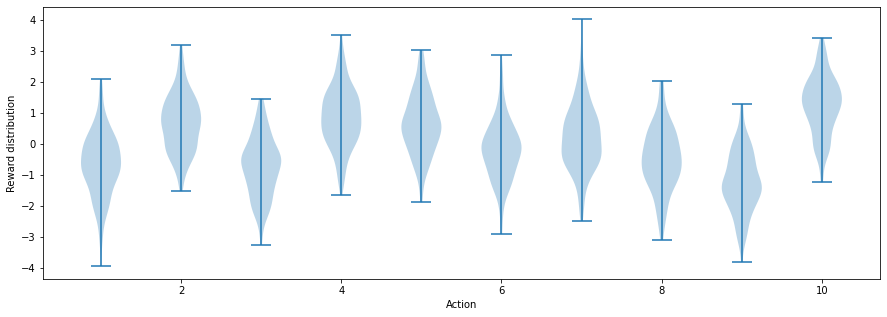

In [5]:
experiment.get_reward_distribution()

## Greedy Agent

In [6]:
agents=[BanditAgent(n_actions=N_ACTIONS, sample_average=True)]
rewards, best_actions = experiment.run(agents)

100%|██████████| 2000/2000 [00:33<00:00, 59.16it/s]


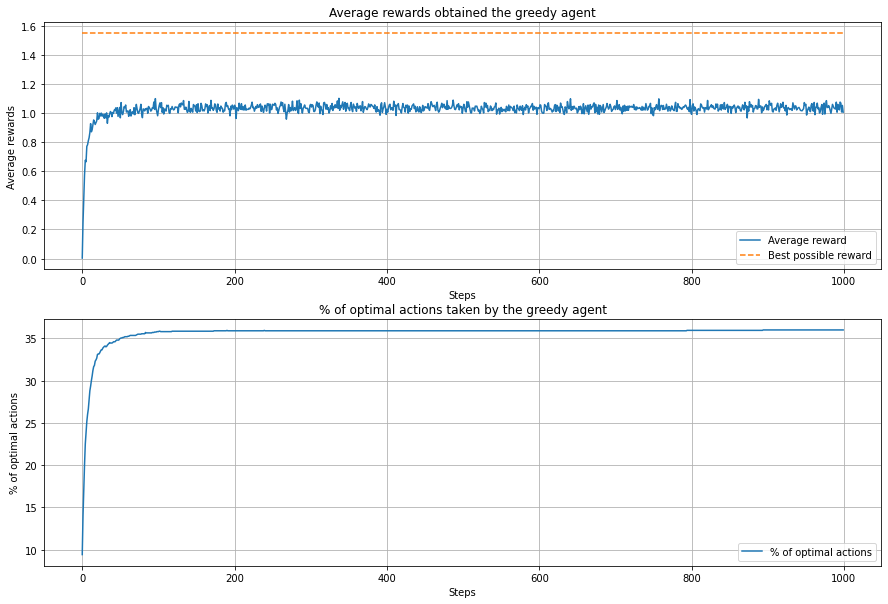

In [7]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].plot(rewards[0], label='Average reward')
axes[0].plot([1.55 for _ in range(N_TIME_STEPS)], label='Best possible reward', linestyle='--')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average rewards')
axes[0].set_title('Average rewards obtained the greedy agent')
axes[0].legend()
axes[0].grid(True)
axes[1].plot(best_actions[0] * 100, label='% of optimal actions')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% of optimal actions')
axes[1].set_title('% of optimal actions taken by the greedy agent')
axes[1].legend()
axes[1].grid(True)
plt.show()

## Epsilon-Greedy Agent

In [8]:
epsilons = [0., 0.01, 0.1, 0.4]
agents = [BanditAgent(n_actions=N_ACTIONS, sample_average=True, epsilon=eps) for eps in epsilons]
rewards, best_actions = experiment.run(agents=agents)

100%|██████████| 2000/2000 [00:28<00:00, 69.85it/s]


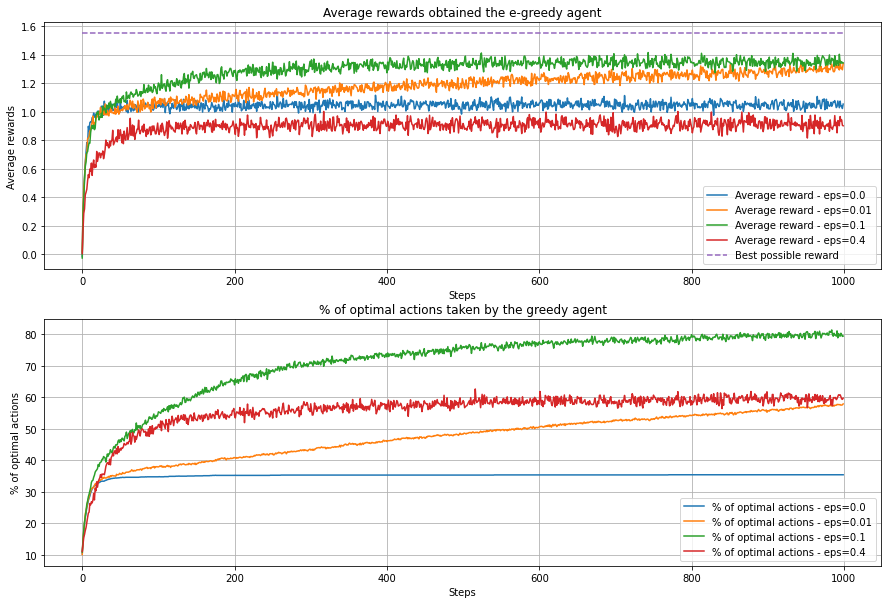

In [9]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))
for i in range(rewards.shape[0]):
    axes[0].plot(rewards[i], label=f'Average reward - eps={epsilons[i]}')
axes[0].plot([1.55 for _ in range(N_TIME_STEPS)], label='Best possible reward', linestyle='--')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average rewards')
axes[0].set_title('Average rewards obtained the e-greedy agent')
axes[0].legend()
axes[0].grid(True)
for i in range(best_actions.shape[0]):
    axes[1].plot(best_actions[i] * 100, label=f'% of optimal actions - eps={epsilons[i]}')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% of optimal actions')
axes[1].set_title('% of optimal actions taken by the greedy agent')
axes[1].legend()
axes[1].grid(True)
plt.show()

### The effect of step-size

In [10]:
step_sizes = [0.01, 0.1, 0.2]
epsilon = 0.1

agents = [BanditAgent(n_actions=N_ACTIONS, sample_average=False, epsilon=epsilon, step_size=step_size) for step_size in step_sizes]
rewards, best_actions = experiment.run(agents=agents)

100%|██████████| 2000/2000 [00:32<00:00, 61.60it/s]


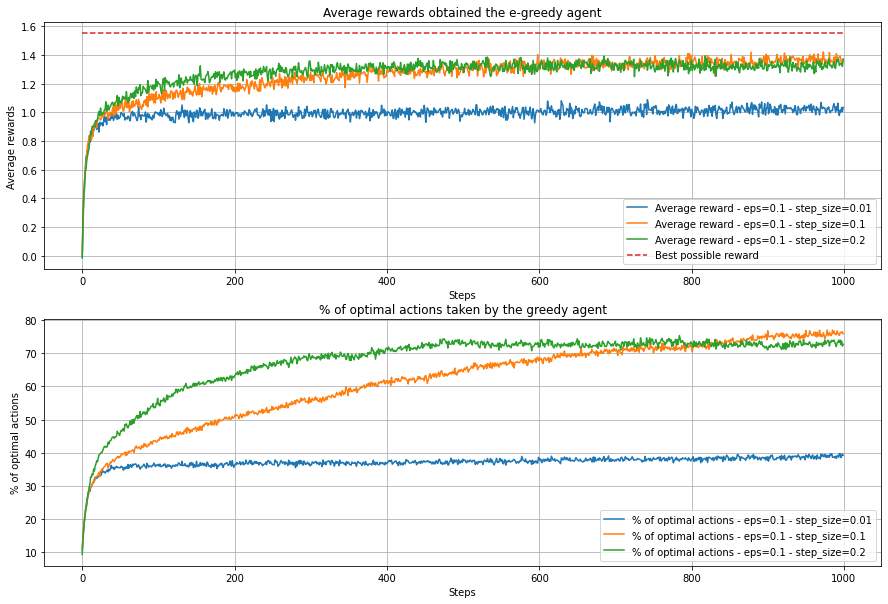

In [11]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))
for i in range(rewards.shape[0]):
    axes[0].plot(rewards[i], label=f'Average reward - eps={epsilon} - step_size={step_sizes[i]}')
axes[0].plot([1.55 for _ in range(N_TIME_STEPS)], label='Best possible reward', linestyle='--')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average rewards')
axes[0].set_title('Average rewards obtained the e-greedy agent')
axes[0].legend()
axes[0].grid(True)
for i in range(best_actions.shape[0]):
    axes[1].plot(best_actions[i] * 100, label=f'% of optimal actions - eps={epsilon} - step_size={step_sizes[i]}')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% of optimal actions')
axes[1].set_title('% of optimal actions taken by the greedy agent')
axes[1].legend()
axes[1].grid(True)
plt.show()

### Optimistic Initial Values

In [12]:
agents = [BanditAgent(n_actions=N_ACTIONS, sample_average=False, epsilon=0., step_size=0.1, initial_value=5),
          BanditAgent(n_actions=N_ACTIONS, sample_average=False, epsilon=0.1, step_size=0.1, initial_value=0)]
rewards, best_actions = experiment.run(agents=agents)

100%|██████████| 2000/2000 [00:32<00:00, 61.62it/s]


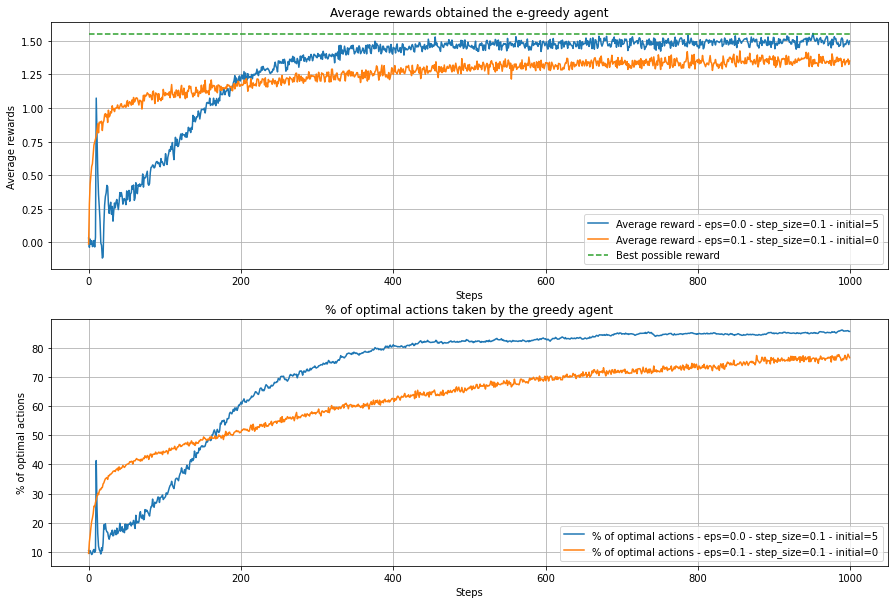

In [13]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))
for i in range(rewards.shape[0]):
    axes[0].plot(rewards[i], label=f'Average reward - eps={agents[i].epsilon} - step_size={agents[i].step_size} - initial={agents[i].initial_value}')
axes[0].plot([1.55 for _ in range(N_TIME_STEPS)], label='Best possible reward', linestyle='--')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average rewards')
axes[0].set_title('Average rewards obtained the e-greedy agent')
axes[0].legend()
axes[0].grid(True)
for i in range(best_actions.shape[0]):
    axes[1].plot(best_actions[i] * 100, label=f'% of optimal actions - eps={agents[i].epsilon} - step_size={agents[i].step_size} - initial={agents[i].initial_value}')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% of optimal actions')
axes[1].set_title('% of optimal actions taken by the greedy agent')
axes[1].legend()
axes[1].grid(True)
plt.show()

### Upper Confidence Bound

In [14]:
agents = [BanditAgent(n_actions=N_ACTIONS, sample_average=True, epsilon=0.1),
          BanditAgent(n_actions=N_ACTIONS, sample_average=True, C=2, initial_value=5)]
rewards, best_actions = experiment.run(agents=agents)

100%|██████████| 2000/2000 [00:58<00:00, 34.43it/s]


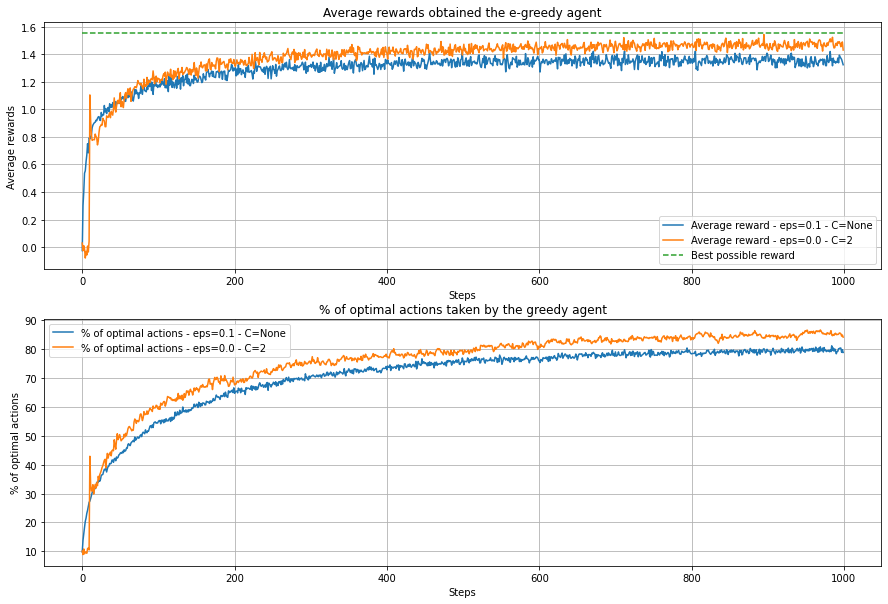

In [15]:
_, axes = plt.subplots(2, 1, figsize=(15, 10))
for i in range(rewards.shape[0]):
    axes[0].plot(rewards[i], label=f'Average reward - eps={agents[i].epsilon} - C={agents[i].C}')
axes[0].plot([1.55 for _ in range(N_TIME_STEPS)], label='Best possible reward', linestyle='--')
axes[0].set_xlabel('Steps')
axes[0].set_ylabel('Average rewards')
axes[0].set_title('Average rewards obtained the e-greedy agent')
axes[0].legend()
axes[0].grid(True)
for i in range(best_actions.shape[0]):
    axes[1].plot(best_actions[i] * 100, label=f'% of optimal actions - eps={agents[i].epsilon} - C={agents[i].C}')
axes[1].set_xlabel('Steps')
axes[1].set_ylabel('% of optimal actions')
axes[1].set_title('% of optimal actions taken by the greedy agent')
axes[1].legend()
axes[1].grid(True)
plt.show()